# **Dispersion Solvers**  

[`plasmapy.dispersion`]: https://docs.plasmapy.org/en/stable/dispersion/index.html

This tutorial introduces us to [`plasmapy.dispersion`], which is a collection of dispersion solvers that are integrated into PlasmaPy.

We will begin with some preliminary imports. To execute a cell in a Jupyter notebook, press **Shift + Enter**.  If you need to restart the notebook, please execute this cell again.

If using Google Colab, click **Run anyway** when prompted.  (If prompted again, select **Restart runtime** when the installation finishes.)

In [ ]:
%matplotlib inline

import sys

if 'google.colab' in str(get_ipython()):
    if 'plasmapy' not in sys.modules:
        !pip install astropy matplotlib numpy plasmapy

import astropy.units as u
from astropy.visualization import quantity_support
from astropy import constants
import matplotlib.pyplot as plt
import numpy as np
from plasmapy.formulary import speeds
from plasmapy.particles import Particle

# Background

When dealing with plasma, it is common to find oneself using dispersion relations. A dispersion relation allows the wavelength/wavenumber to be related to the frequency.


---



For electromagnetic waves in a vaccumn, the dispersion relation is:

$k^{2} - \omega^{2}c^{2} = 0 \, ,$

where $k$ is the wavenumber, $\omega$ is the frequency and $c$ is the speed of light.


---



When working with plasma however, the dispersion relationships tend to be more complex. To deal with these more complex relationships, PlasmaPy has implemented a number of solvers to make life a little easier.

# Stix Dispersion

[`Stix`]: https://docs.plasmapy.org/en/stable/notebooks/dispersion/stix_dispersion.html

Today we are going to look at one specific dispersion relation, [`Stix`], which allows us to calculate the dispersion relationship for a cold plasma.  


To begin, we import the stix function from the dispersion subpackage and define some input values.

In [ ]:
from plasmapy.dispersion.analytical.stix_ import stix

inputs_1 = {}

B – The magnetic field magnitude in units convertible to T.

ω – Wavefrequency in units convertible to rad/s.

ions – A list or single instance of particle-like objects representing the ion species.

n_i – Ion number density in units convertible to ${\rm m}^{-3}$.

theta – The angle of propagation of the wave with respect to the magnetic field.



---



Note: Stix is able to take a single value/array for theta or ω, so which one you choose depends on the situation.

[`Stix`]: https://docs.plasmapy.org/en/stable/notebooks/dispersion/stix_dispersion.html

[`Stix`] will calculate the normal surface waves propagating through a magnetized uniform cold plasma. So next we define a meshgrid based on the number of theta values, then we compute the corresponding wavenumbers.


In [ ]:
omegas, thetas = np.meshgrid(
    inputs_1["w"].value, inputs_1["theta"].value, indexing="ij"
)
omegas = np.dstack((omegas,) * 4).squeeze()
thetas = np.dstack((thetas,) * 4).squeeze()

k =

With our wavenumbers computed, we can calculate the corresponding velocities in x and z.



In [ ]:
from astropy.constants.si import c

u_v = {}

mask = np.imag(k) == 0

va_1 = speeds.va_(inputs_1["B"], inputs_1["n_i"], ion=inputs_1["ions"])
for arr in k:
    val = 0
    for item in arr:
        val = val + item**2
    norm = (np.sqrt(val) * va_1 / inputs_1["w"]).value ** 2
    u_v = {
        "ux": norm * omegas[mask] * np.sin(thetas[mask]) / (k.value[mask] * c.value),
        "uz": norm * omegas[mask] * np.cos(thetas[mask]) / (k.value[mask] * c.value),
    }

Let us plot the results

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


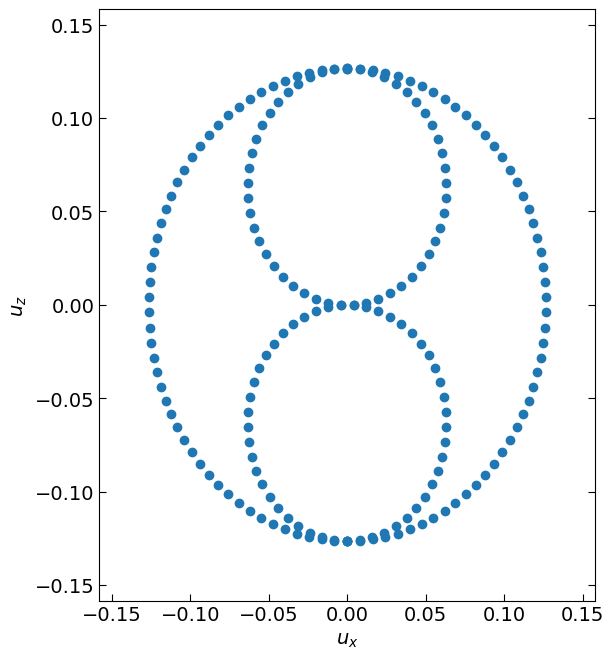

In [ ]:
fs = 14
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

plt.scatter(
    u_v["ux"],
    u_v["uz"],
)

plt.xlabel(r"$u_x$", fontsize=fs)
plt.ylabel(r"$u_z$", fontsize=fs)

pad = 1.25
plt.ylim(min(u_v["uz"]) * pad, max(u_v["uz"]) * pad)
plt.xlim(min(u_v["ux"]) * pad, max(u_v["ux"]) * pad)

plt.tick_params(
    which="both",
    direction="in",
    labelsize=fs,
    right=True,
    length=5,
)


plt.show()

Different input values will produce very different plots, try one of the following.

In [ ]:
inputs_2 = {
    "theta": np.linspace(0, np.pi, 100) * u.rad,
    "ions": Particle("p"),
    "n_i": 1e12 * u.cm**-3,
    "B": 0.434 * u.T,
    "w": (37125810) * u.rad / u.s,
}

inputs_3 = {
    "theta": np.linspace(0, np.pi, 100) * u.rad,
    "ions": Particle("p"),
    "n_i": 1e12 * u.cm**-3,
    "B": 0.434534 * u.T,
    "w": (2 * 10**10) * u.rad / u.s,
}

inputs_4 = {
    "theta": np.linspace(0, np.pi, 100) * u.rad,
    "ions": Particle("p"),
    "n_i": 1e12 * u.cm**-3,
    "B": 0.434600 * u.T,
    "w": (54 * 10**9) * u.rad / u.s,
}

inputs_5 = {
    "theta": np.linspace(0, np.pi, 100) * u.rad,
    "ions": Particle("p"),
    "n_i": 1e12 * u.cm**-3,
    "B": 0.434634 * u.T,
    "w": (58 * 10**9) * u.rad / u.s,
}

# Additional Solvers


PlasmaPy can solve dispersion relations both numerically and analytically, each type of solver is stored in its own sub directory.

[`plasmapy.dispersion.analytical`]: https://docs.plasmapy.org/en/stable/api_static/plasmapy.dispersion.analytical.html

[`plasmapy.dispersion.numerical`]: https://docs.plasmapy.org/en/stable/api_static/plasmapy.dispersion.numerical.html

[`MHD`]: https://docs.plasmapy.org/en/stable/api_static/plasmapy.dispersion.analytical.mhd_waves_.htm

[`Stix`]: https://docs.plasmapy.org/en/stable/notebooks/dispersion/stix_dispersion.html

[`Two Fluid`]: https://docs.plasmapy.org/en/stable/api/plasmapy.dispersion.analytical.two_fluid_.two_fluid.html

[`Hollweg`]: https://docs.plasmapy.org/en/stable/api/plasmapy.dispersion.numerical.hollweg_.hollweg.html

[`Kinetic Alfven`]: https://docs.plasmapy.org/en/stable/api/plasmapy.dispersion.numerical.kinetic_alfven_.kinetic_alfven.html

The current analytical solvers in [`plasmapy.dispersion.analytical`]are:


*   [`MHD`]
*   [`Stix`]
*   [`Two Fluid`]

and the current numerical solvers in [`plasmapy.dispersion.numerical`] are:


*   [`Hollweg`]
*   [`Kinetic Alfven`]




[`Dispersion Function`]: https://docs.plasmapy.org/en/stable/notebooks/dispersion/dispersion_function.html

# Dispersion Function

Additionally, the dispersion subpackage contains the [`Dispersion Function`], which is commonly used in plasma physics.

The dispersion function is given as:

$Z(\zeta) = \frac{1}{\sqrt\pi} \int^{∞}_{-∞} \frac{e^{-x^{2}}}{x - \zeta} dx \, .$

In plasma wave theory, the plasma dispersion function appears frequently when the background medium has a Maxwellian distribution function. The argument of this function then refers to the ratio of a wave’s phase velocity to a thermal velocity.


To begin let us import the function and make some sample data to visualize the dispersion function.

In [ ]:
from plasmapy.dispersion import plasma_dispersion_func
from plasmapy.dispersion import plasma_dispersion_func_deriv

start =
stop  =
num   =



We can create a plotting function to visualize our simple dispersion relation.




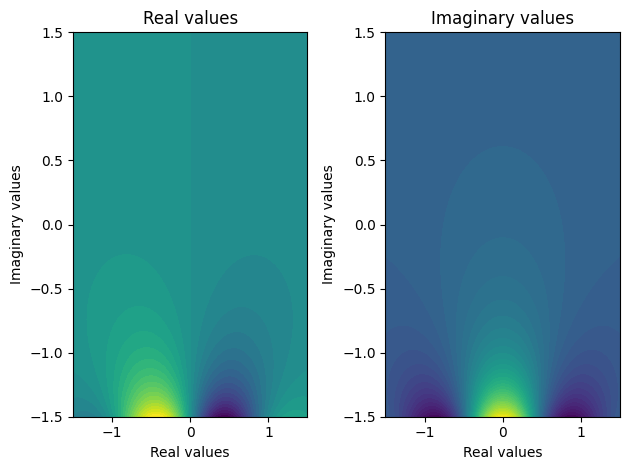

In [ ]:
x = np.linspace(start, stop, num)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y

def plot_complex(X, Y, Z, N=50):
    fig, (real_axis, imag_axis) = plt.subplots(1, 2)
    real_axis.contourf(X, Y, Z.real, N)
    imag_axis.contourf(X, Y, Z.imag, N)
    real_axis.set_title("Real values")
    imag_axis.set_title("Imaginary values")
    for ax in [real_axis, imag_axis]:
        ax.set_xlabel("Real values")
        ax.set_ylabel("Imaginary values")
    fig.tight_layout()


F = plasma_dispersion_func(Z)
plot_complex(X, Y, F)


We can also visualize the derivative of the dispersion function as follows.

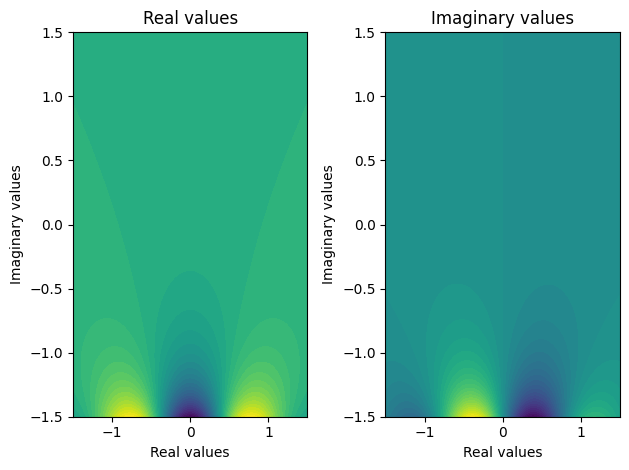

In [ ]:
F = plasma_dispersion_func_deriv(Z)
plot_complex(X, Y, F)